___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___

# Finance Data Project 

In this data project we will focus on exploratory data analysis of stock prices. Keep in mind, this project is just meant to practice your visualization and pandas skills, it is not meant to be a robust financial analysis or be taken as financial advice.
____
** NOTE: This project is extremely challenging because it will introduce a lot of new concepts and have you looking things up on your own (we'll point you in the right direction) to try to solve the tasks issued. Feel free to just go through the solutions lecture notebook and video as a "walkthrough" project if you don't want to have to look things up yourself. You'll still learn a lot that way! **
____
We'll focus on bank stocks and see how they progressed throughout the [financial crisis](https://en.wikipedia.org/wiki/Financial_crisis_of_2007%E2%80%9308) all the way to early 2016.

## Get the Data

In this section we will learn how to use pandas to directly read data from Google finance using pandas!

First we need to start with the proper imports, which we've already laid out for you here.

*Note: [You'll need to install pandas-datareader for this to work!](https://github.com/pydata/pandas-datareader) Pandas datareader allows you to [read stock information directly from the internet](http://pandas.pydata.org/pandas-docs/stable/remote_data.html) Use these links for install guidance (**pip install pandas-datareader**), or just follow along with the video lecture.*

### The Imports

Already filled out for you.

In [1]:
!pip install pandas_datareader

from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
%matplotlib inline

   ---------------------------------------- 0.0/3.8 MB ? eta -:--:--
   --------------------- ------------------ 2.1/3.8 MB 10.7 MB/s eta 0:00:01
   ---------------------------------------- 3.8/3.8 MB 11.4 MB/s eta 0:00:00


## Data

We need to get data using pandas datareader. We will get stock information for the following banks:
*  Bank of America
* CitiGroup
* Goldman Sachs
* JPMorgan Chase
* Morgan Stanley
* Wells Fargo

** Figure out how to get the stock data from Jan 1st 2006 to Jan 1st 2016 for each of these banks. Set each bank to be a separate dataframe, with the variable name for that bank being its ticker symbol. This will involve a few steps:**
1. Use datetime to set start and end datetime objects.
2. Figure out the ticker symbol for each bank.
2. Figure out how to use datareader to grab info on the stock.

** Use [this documentation page](https://pandas-datareader.readthedocs.io/en/latest/remote_data.html) for hints and instructions (it should just be a matter of replacing certain values. Use google finance as a source, for example:**
    
    # Bank of America
    BAC = data.DataReader("BAC", 'google', start, end)

### WARNING: MAKE SURE TO CHECK THE LINK ABOVE FOR THE LATEST WORKING API. "google" MAY NOT ALWAYS WORK. 
------------
### We also provide pickle file in the article lecture right before the video lectures.

In [5]:
!pip install yfinance

     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
     ------------------------------- -------- 2.4/3.0 MB 12.2 MB/s eta 0:00:01
     ---------------------------------------- 3.0/3.0 MB 11.5 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for peewee: filename=peewee-3.17.6-py3-none-any.whl size=138939 sha256=530f32b5dae644fd2ad7af1aa1677c9860104d21b5129abd2640087760f42b6d
  Stored in directory: c:\users\soham raktawan\appdata\local\pip\cache\wheels\a6\5e\0f\8319805c4115320e0d3e8fb5799b114a2e4c4a3d6c7e523b06
Successfully built peewee


In [17]:
import yfinance as yf

# Define stock ticker and download data
bac = yf.download("BAC", start='2006-01-01', end='2016-01-01')
c = yf.download("C", start='2006-01-01', end='2016-01-01')
gs = yf.download("GS", start='2006-01-01', end='2016-01-01')
jpm = yf.download("JPM", start='2006-01-01', end='2016-01-01')
ms = yf.download("MS", start='2006-01-01', end='2016-01-01')
wfc = yf.download("WFC", start='2006-01-01', end='2016-01-01')
# Display the data
print(bac.head())

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

                 Open       High        Low      Close  Adj Close    Volume
Date                                                                       
2006-01-03  46.919998  47.180000  46.150002  47.080002  31.544907  16296700
2006-01-04  47.000000  47.240002  46.450001  46.580002  31.209892  17757900
2006-01-05  46.580002  46.830002  46.320000  46.639999  31.250101  14970700
2006-01-06  46.799999  46.910000  46.349998  46.570000  31.203201  12599800
2006-01-09  46.720001  46.970001  46.360001  46.599998  31.223305  15619400


** Create a list of the ticker symbols (as strings) in alphabetical order. Call this list: tickers**

In [18]:
tickers = ["BAC", "C", "GS", "JPM", "MS", "WFC"]

** Use pd.concat to concatenate the bank dataframes together to a single data frame called bank_stocks. Set the keys argument equal to the tickers list. Also pay attention to what axis you concatenate on.**

In [22]:
bank_stocks = pd.concat([bac, c, gs, jpm, ms, wfc], keys=tickers, axis=1)

** Set the column name levels (this is filled out for you):**

In [23]:
bank_stocks.columns.names = ['Bank Ticker','Stock Info']

** Check the head of the bank_stocks dataframe.**

In [24]:
bank_stocks.head()

Bank Ticker        BAC                                                        \
Stock Info        Open       High        Low      Close  Adj Close    Volume   
Date                                                                           
2006-01-03   46.919998  47.180000  46.150002  47.080002  31.544907  16296700   
2006-01-04   47.000000  47.240002  46.450001  46.580002  31.209892  17757900   
2006-01-05   46.580002  46.830002  46.320000  46.639999  31.250101  14970700   
2006-01-06   46.799999  46.910000  46.349998  46.570000  31.203201  12599800   
2006-01-09   46.720001  46.970001  46.360001  46.599998  31.223305  15619400   

Bank Ticker           C                                      ...         MS  \
Stock Info         Open        High         Low       Close  ...        Low   
Date                                                         ...              
2006-01-03   490.000000  493.799988  481.100006  492.899994  ...  56.740002   
2006-01-04   488.600006  491.000000  483.500000  483.799988  ...  58.349998   
2006-01-05   484.399994  487.799988  484.000000  486.200012  ...  58.020000   
2006-01-06   488.799988  489.000000  482.000000  486.200012  ...  58.049999   
2006-01-09   486.000000  487.399994  483.000000  483.899994  ...  58.619999   

Bank Ticker                                        WF                        \
Stock Info       Close  Adj Close   Volume       Open       High        Low   
Date                                                                          
2006-01-03   58.310001  32.661316  5377000  31.600000  31.975000  31.195000   
2006-01-04   58.349998  32.683723  7977800  31.799999  31.820000  31.365000   
2006-01-05   58.509998  32.773331  5778000  31.500000  31.555000  31.309999   
2006-01-06   58.570000  32.806946  6889800  31.580000  31.775000  31.385000   
2006-01-09   59.189999  33.154221  4144500  31.674999  31.825001  31.555000   

Bank Ticker                                  
Stock Info       Close  Adj Close    Volume  
Date                                         
2006-01-03   31.900000  18.979546  11016400  
2006-01-04   31.530001  18.759415  10870000  
2006-01-05   31.495001  18.738592  10158000  
2006-01-06   31.680000  18.848663   8403800  
2006-01-09   31.674999  18.845682   5619600  

[5 rows x 36 columns]

# EDA

Let's explore the data a bit! Before continuing, I encourage you to check out the documentation on [Multi-Level Indexing](http://pandas.pydata.org/pandas-docs/stable/advanced.html) and [Using .xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html).
Reference the solutions if you can not figure out how to use .xs(), since that will be a major part of this project.

** What is the max Close price for each bank's stock throughout the time period?**

In [95]:
result = bank_stocks.xs("Adj Close", level="Stock Info", axis=1)
print(result)

Bank Ticker        BAC           C          GS        JPM         MS  \
Date                                                                   
2006-01-03   31.544907  329.149963   96.240082  24.516233  32.661316   
2006-01-04   31.209892  323.073090   94.910744  24.374733  32.683723   
2006-01-05   31.250101  324.675720   94.873444  24.448557  32.773331   
2006-01-06   31.203201  324.675720   96.217667  24.620821  32.806946   
2006-01-09   31.223305  323.139954   97.375198  25.020708  33.154221   
...                ...         ...         ...        ...        ...   
2015-12-24   14.271371   40.824467  152.493011  52.210140  25.353052   
2015-12-28   14.155676   40.568890  151.782608  52.037666  25.111071   
2015-12-29   14.279634   41.033592  153.378830  52.578587  25.407690   
2015-12-30   14.089565   40.506931  152.108551  52.202297  25.157906   
2015-12-31   13.907765   40.080940  150.620972  51.763283  24.830069   

Bank Ticker         WF  
Date                    
2006-01-03   

In [97]:
print(result.max())

Bank Ticker
BAC     38.148521
C      392.417023
GS     187.925247
JPM     54.544682
MS      51.200241
WF      44.742981
dtype: float64


Bank Ticker
BAC     54.90
C      564.10
GS     247.92
JPM     70.08
MS      89.30
WFC     58.52
dtype: float64

** Create a new empty DataFrame called returns. This dataframe will contain the returns for each bank's stock. returns are typically defined by:**

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [114]:
returns = pd.DataFrame()
# for ticker in tickers:
#     col = (result[ticker] - result[ticker].shift(1))/result[ticker] # pct_change can also be used
#     col.name = ticker + " Returns"
#     returns = pd.concat([returns, col.to_frame()], axis=1)

# print(returns)

for tick in tickers:
    returns[tick+" Returns"] = bank_stocks[tick]["Adj Close"].pct_change()

returns.head()

,BAC Returns,C Returns,GS Returns,JPM Returns,MS Returns,WF Returns
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013813,-0.005772,0.000686,-0.011598
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.001110
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001026,0.005874
2006-01-09,0.000644,-0.004730,0.012030,0.016242,0.010585,-0.000158


** We can use pandas pct_change() method on the Close column to create a column representing this return value. Create a for loop that goes and for each Bank Stock Ticker creates this returns column and set's it as a column in the returns DataFrame.**

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.000951
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005714
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,0.000000


** Create a pairplot using seaborn of the returns dataframe. What stock stands out to you? Can you figure out why?**

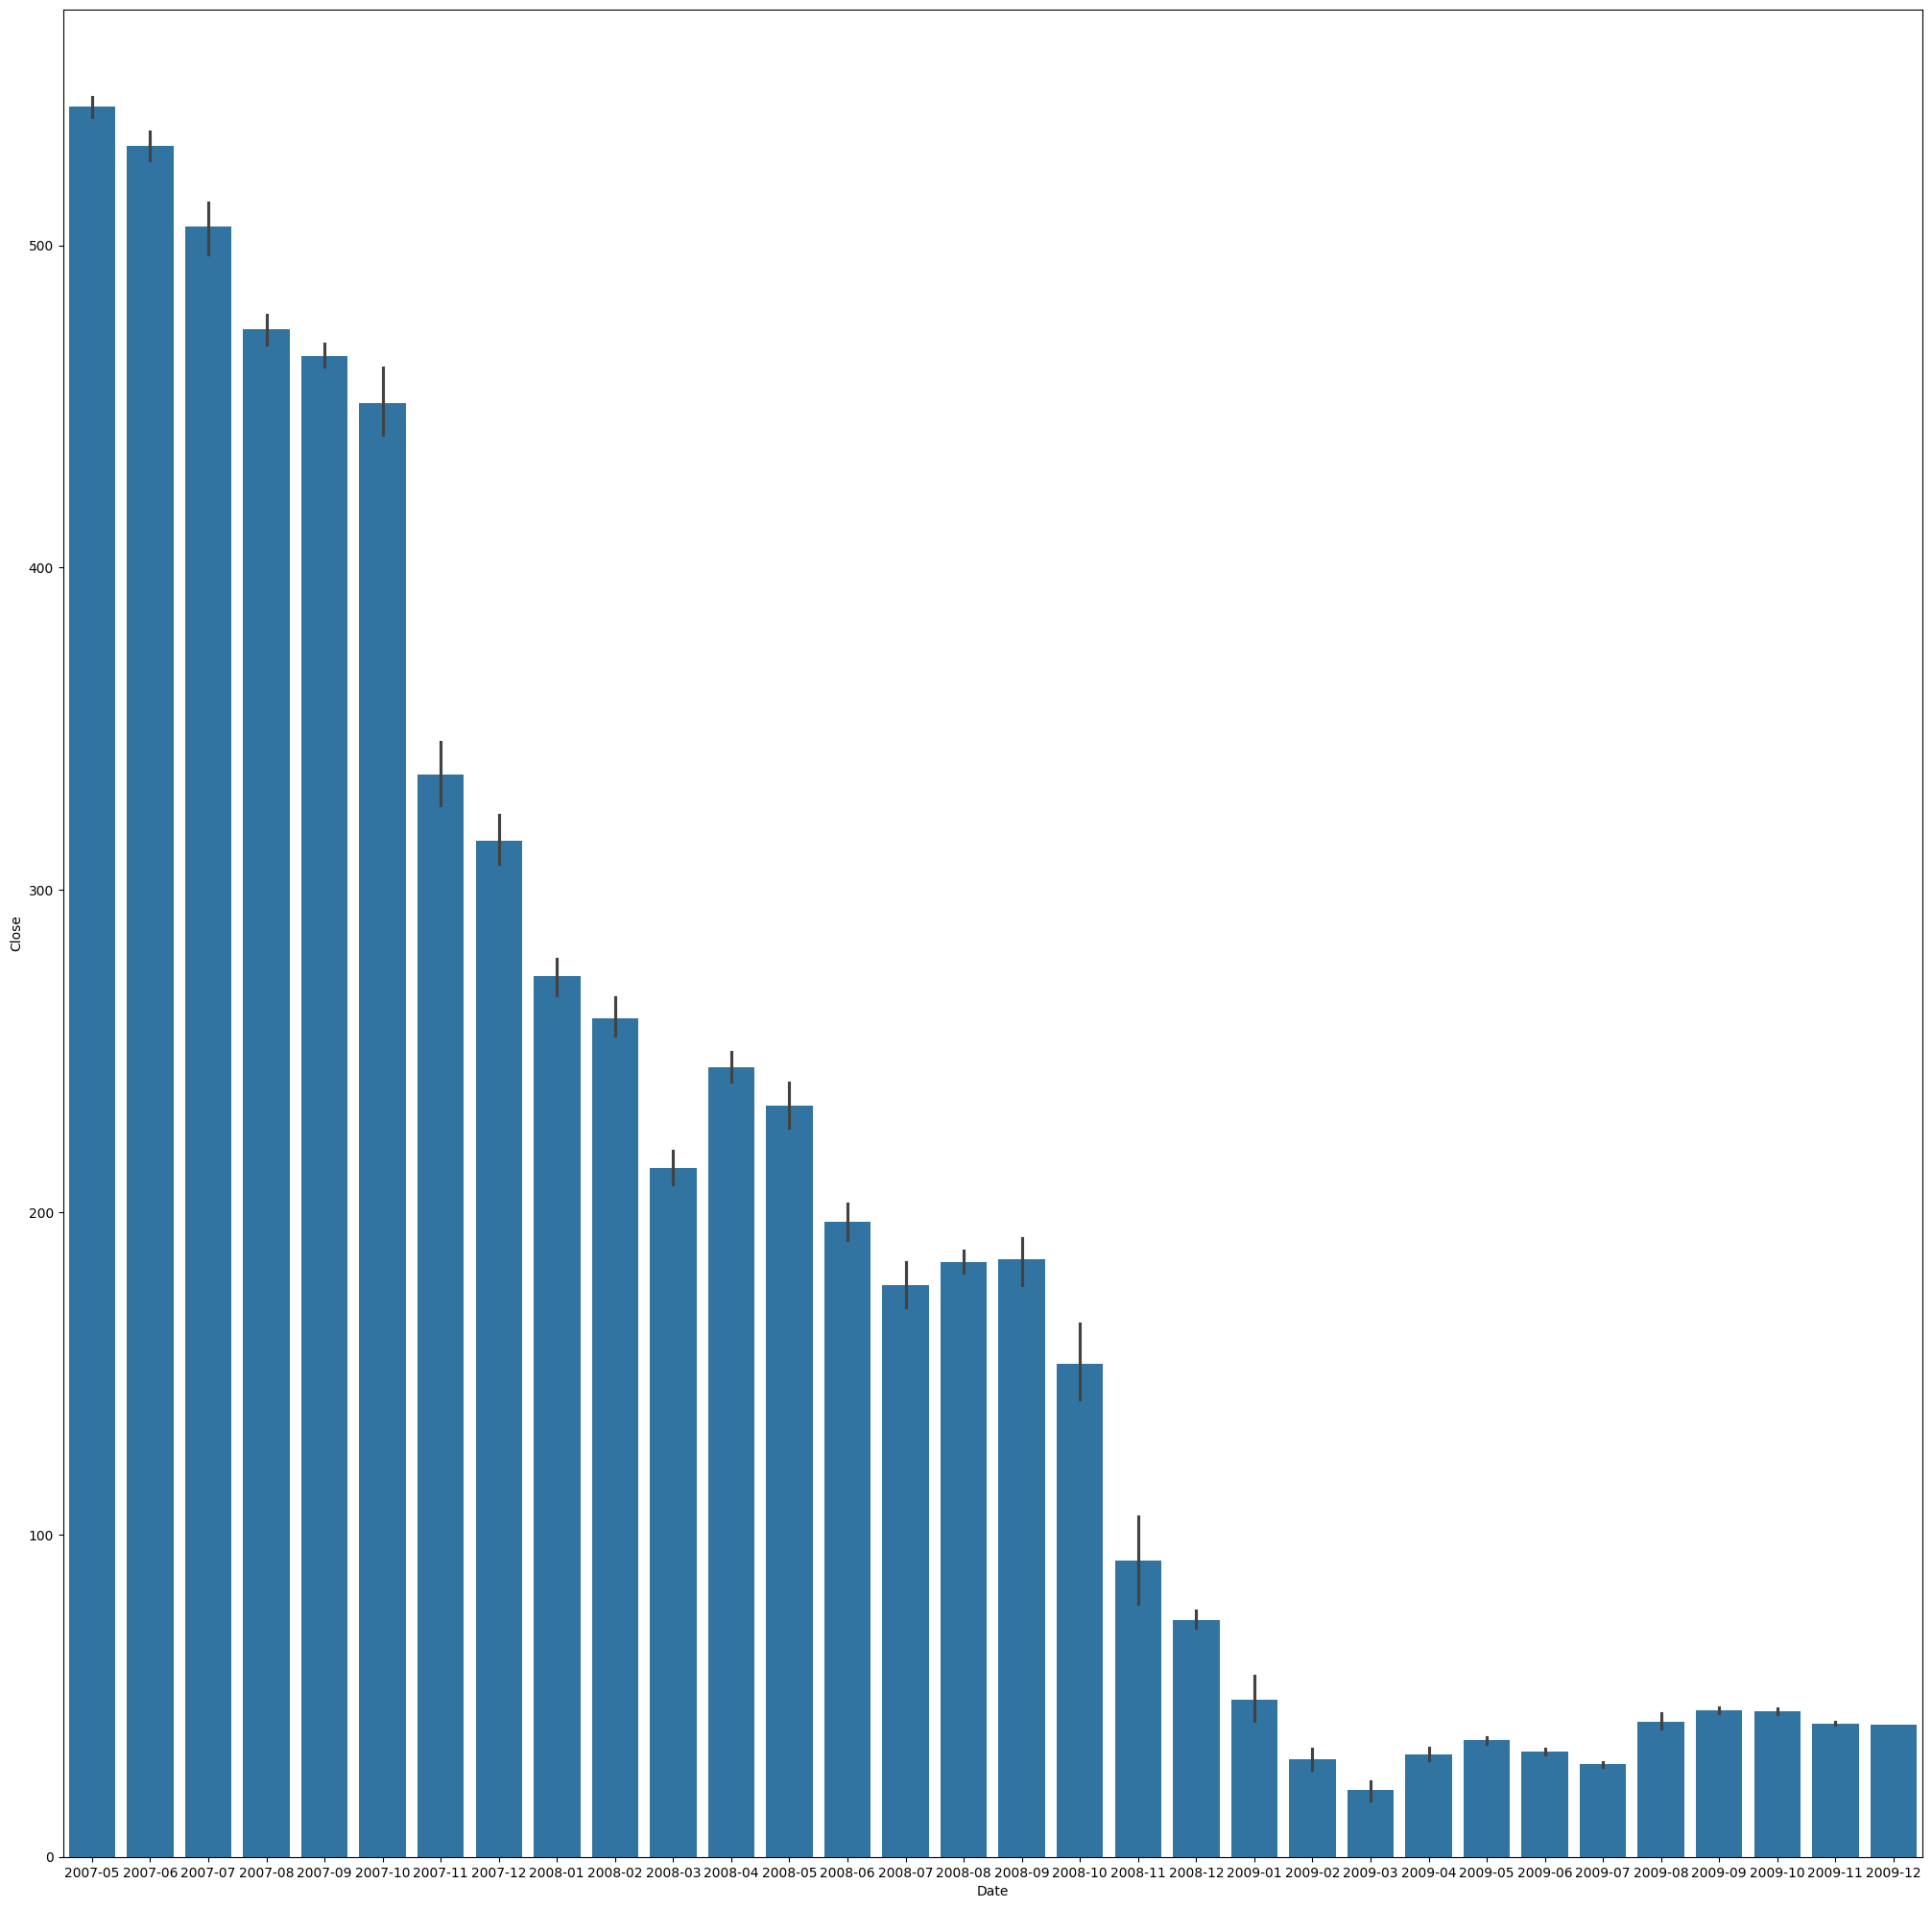

In [94]:
# bank_stocks["C"]["Close"].index[0]
import matplotlib.pyplot as plt

plt.figure(figsize=(25, 25))
start_date = '2007-05-01'
end_date = '2009-12-01'

# Extract rows between the two dates using .loc
filtered_data = bank_stocks.loc[start_date:end_date]
sns.barplot(x = filtered_data["C"]["Close"].index.to_period('M'), y=filtered_data["C"]["Close"] )
plt.show()

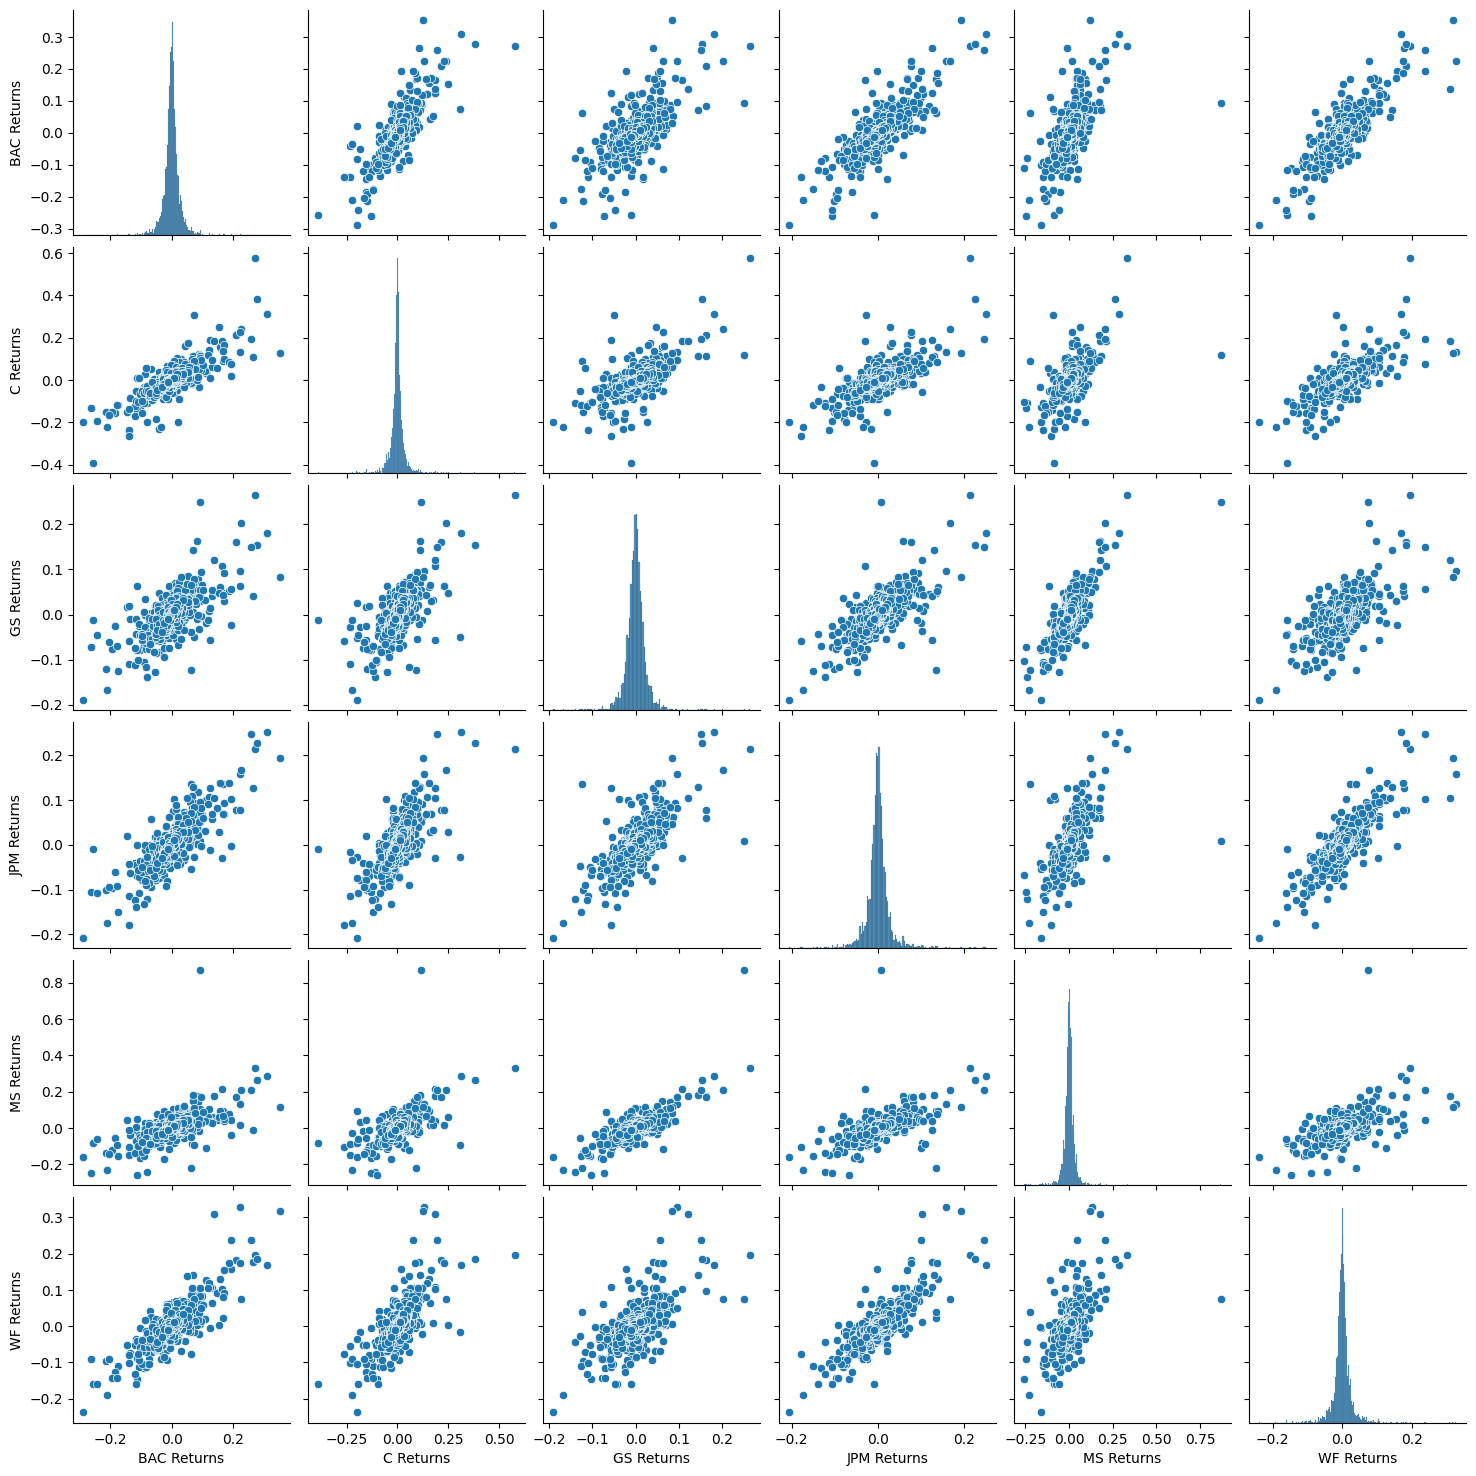

In [115]:
import seaborn as sns

sns.pairplot(data = returns)

<Axes: >

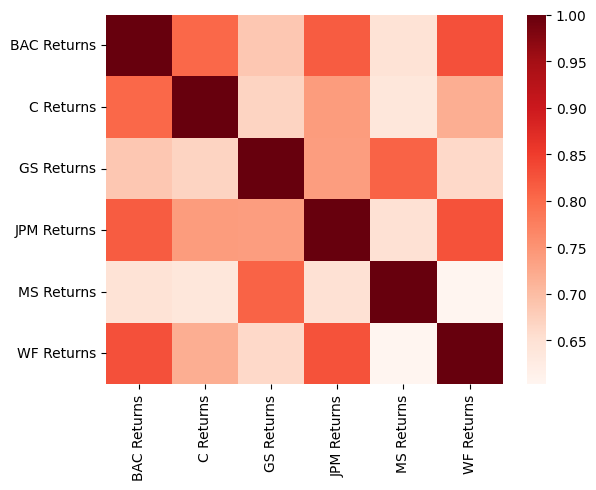

In [100]:
sns.heatmap(returns.corr(), cmap="Reds")

* See solution for details about Citigroup behavior....

** Using this returns DataFrame, figure out on what dates each bank stock had the best and worst single day returns. You should notice that 4 of the banks share the same day for the worst drop, did anything significant happen that day?**

In [101]:
returns.idxmin()

BAC Returns   2009-01-20
C Returns     2009-02-27
GS Returns    2009-01-20
JPM Returns   2009-01-20
MS Returns    2008-10-09
WF Returns    2009-01-20
dtype: datetime64[ns]

In [102]:
returns.idxmax()

BAC Returns   2009-04-09
C Returns     2008-11-24
GS Returns    2008-11-24
JPM Returns   2009-01-21
MS Returns    2008-10-13
WF Returns    2008-07-16
dtype: datetime64[ns]

BAC Return   2009-01-20
C Return     2011-05-06
GS Return    2009-01-20
JPM Return   2009-01-20
MS Return    2008-10-09
WFC Return   2009-01-20
dtype: datetime64[ns]

** You should have noticed that Citigroup's largest drop and biggest gain were very close to one another, did anythign significant happen in that time frame? **

* See Solution for details

BAC Return   2009-04-09
C Return     2011-05-09
GS Return    2008-11-24
JPM Return   2009-01-21
MS Return    2008-10-13
WFC Return   2008-07-16
dtype: datetime64[ns]

** Take a look at the standard deviation of the returns, which stock would you classify as the riskiest over the entire time period? Which would you classify as the riskiest for the year 2015?**

In [105]:
returns.std()
# Citi bank appears to be most risky

BAC Returns    0.036659
C Returns      0.038672
GS Returns     0.025386
JPM Returns    0.027675
MS Returns     0.037717
WF Returns     0.030195
dtype: float64

BAC Return    0.036650
C Return      0.179969
GS Return     0.025346
JPM Return    0.027656
MS Return     0.037820
WFC Return    0.030233
dtype: float64

In [126]:
start_date = '2015-01-01'
end_date = '2016-01-01'

returns[start_date:end_date]

,BAC Returns,C Returns,GS Returns,JPM Returns,MS Returns,WF Returns
Date,,,,,,
2015-01-02,0.000559,0.002772,0.002993,0.004985,-0.002320,-0.002188
2015-01-05,-0.029050,-0.031515,-0.031223,-0.031045,-0.031258,-0.027423
2015-01-06,-0.029919,-0.035204,-0.020230,-0.025929,-0.028800,-0.020865
2015-01-07,0.004745,0.009270,0.014903,0.001526,0.014278,0.005951
2015-01-08,0.020661,0.015048,0.015965,0.022346,0.014889,0.022137
...,...,...,...,...,...,...
2015-12-24,-0.004037,0.001520,-0.002624,-0.001948,-0.003681,-0.003997
2015-12-28,-0.008107,-0.006260,-0.004659,-0.003303,-0.009544,-0.002554
2015-12-29,0.008757,0.011455,0.010517,0.010395,0.011812,0.011155


In [106]:
start_date = '2015-01-01'
end_date = '2016-01-01'

returns[start_date:end_date].std()


BAC Returns    0.016174
C Returns      0.015288
GS Returns     0.014043
JPM Returns    0.014006
MS Returns     0.016287
WF Returns     0.012552
dtype: float64

BAC Return    0.016163
C Return      0.015289
GS Return     0.014046
JPM Return    0.014017
MS Return     0.016249
WFC Return    0.012591
dtype: float64

** Create a distplot using seaborn of the 2015 returns for Morgan Stanley **

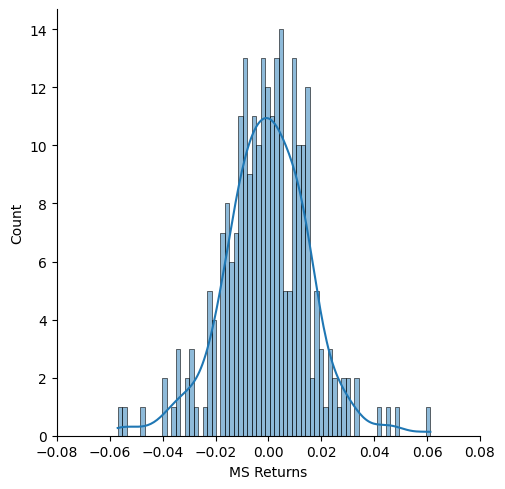

In [123]:

sns.displot(x="MS Returns", data=returns[start_date:end_date], kde=True, bins=70)
plt.xlim(-0.08, 0.08)
plt.show()

/Users/marci/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning:

using a non-integer number instead of an integer will result in an error in the future



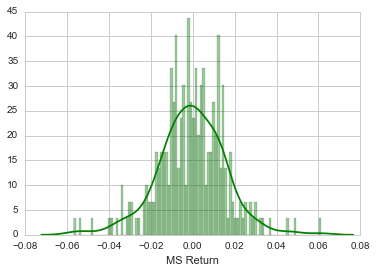

** Create a distplot using seaborn of the 2008 returns for CitiGroup **

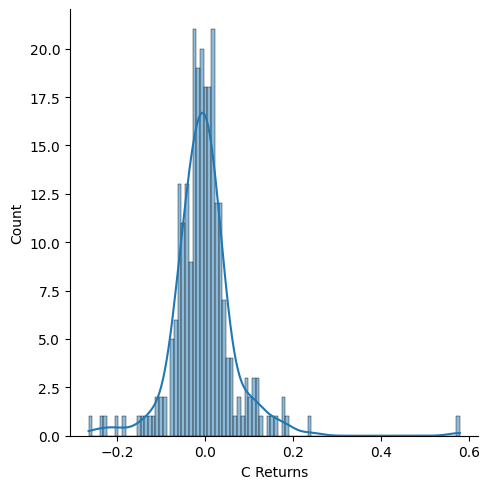

In [125]:
start_date = '2008-01-01'
end_date = '2009-01-01'

sns.displot(x="C Returns", data=returns[start_date:end_date], kde=True, bins=100)



/Users/marci/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning:

using a non-integer number instead of an integer will result in an error in the future



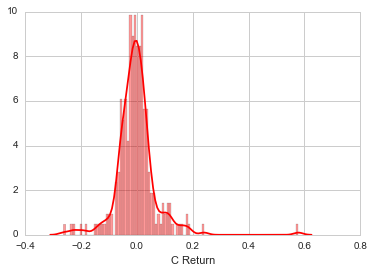

____
# More Visualization

A lot of this project will focus on visualizations. Feel free to use any of your preferred visualization libraries to try to recreate the described plots below, seaborn, matplotlib, plotly and cufflinks, or just pandas.

### Imports

In [127]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Optional Plotly Method Imports
import plotly
import cufflinks as cf
cf.go_offline()

** Create a line plot showing Close price for each bank for the entire index of time. (Hint: Try using a for loop, or use [.xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html) to get a cross section of the data.)**

In [154]:
min_close = bank_stocks.xs(key="Adj Close", level="Stock Info", axis=1)

min_close.idxmin()

Bank Ticker
BAC   2009-03-06
C     2009-03-05
GS    2008-11-20
JPM   2009-03-09
MS    2008-11-20
WF    2009-03-05
dtype: datetime64[ns]

In [158]:
min_close.idxmax()

Bank Ticker
BAC   2007-10-05
C     2006-12-27
GS    2007-10-31
JPM   2015-07-22
MS    2007-06-14
WF    2015-07-22
dtype: datetime64[ns]

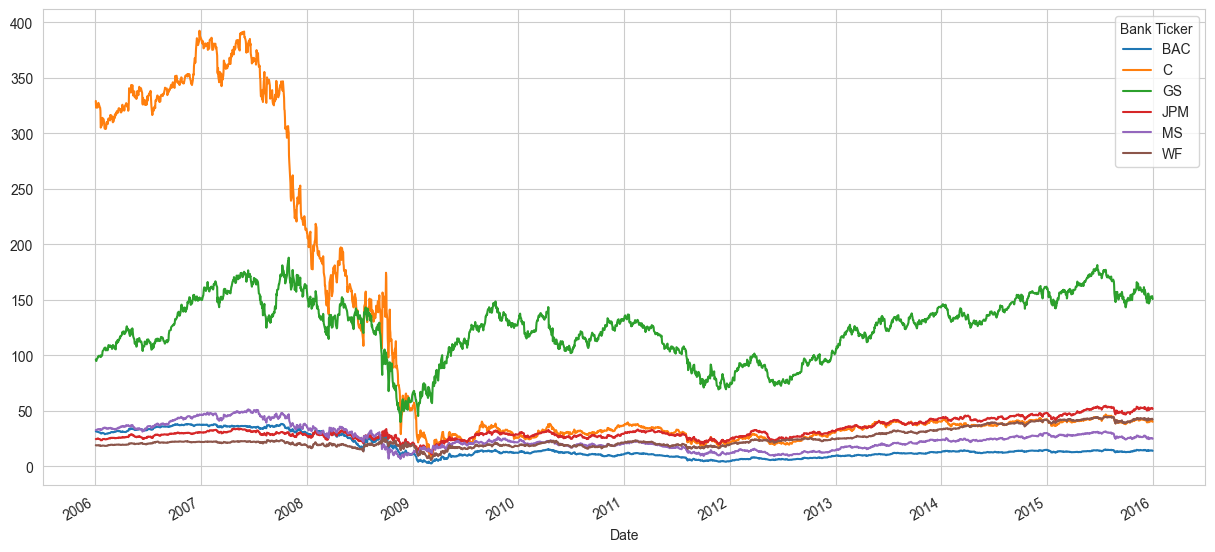

In [152]:
sub = bank_stocks.xs(key="Adj Close", level = "Stock Info", axis=1)

sub.plot(kind = "line", figsize=(15, 7))

# sub.reset_index()

# for tick in tickers:
#     sns.lineplot(x="Date", y=tick, data=sub)

# plt.show()

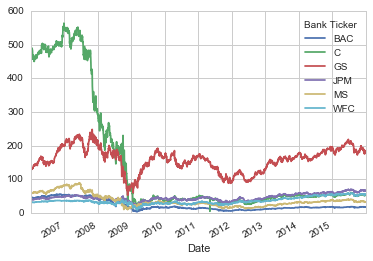

## Moving Averages

Let's analyze the moving averages for these stocks in the year 2008. 

** Plot the rolling 30 day average against the Close Price for Bank Of America's stock for the year 2008**

<Axes: xlabel='Date'>

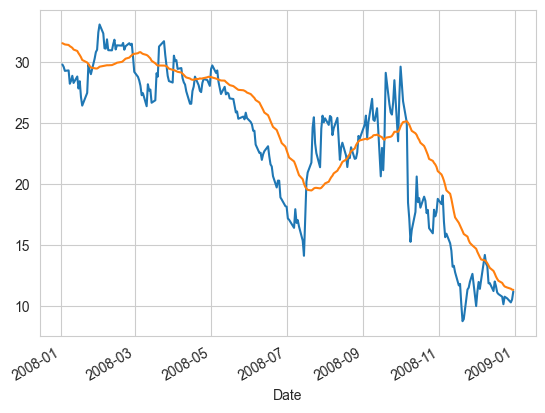

In [166]:
start_date = '2008-01-01'
end_date = '2009-01-01'

min_close['Rolling_Avg'] = min_close["BAC"].rolling(window=30).mean()

min_close["BAC"][start_date:end_date].plot()
min_close["Rolling_Avg"][start_date:end_date].plot()


<Axes: xlabel='Date'>

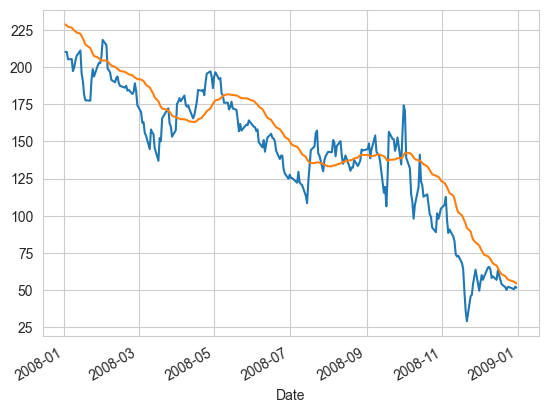

In [163]:
start_date = '2008-01-01'
end_date = '2009-01-01'

min_close['Rolling_Avg_C'] = min_close["C"].rolling(window=30).mean()

min_close["C"][start_date:end_date].plot()
min_close["Rolling_Avg_C"][start_date:end_date].plot()


<Axes: xlabel='Date'>

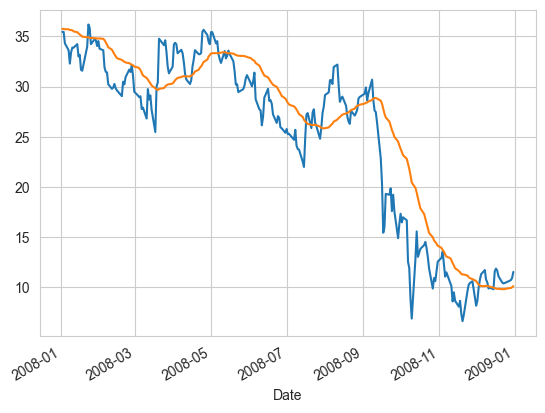

In [164]:
start_date = '2008-01-01'
end_date = '2009-01-01'

min_close['Rolling_Avg_MS'] = min_close["MS"].rolling(window=30).mean()

min_close["MS"][start_date:end_date].plot()
min_close["Rolling_Avg_MS"][start_date:end_date].plot()

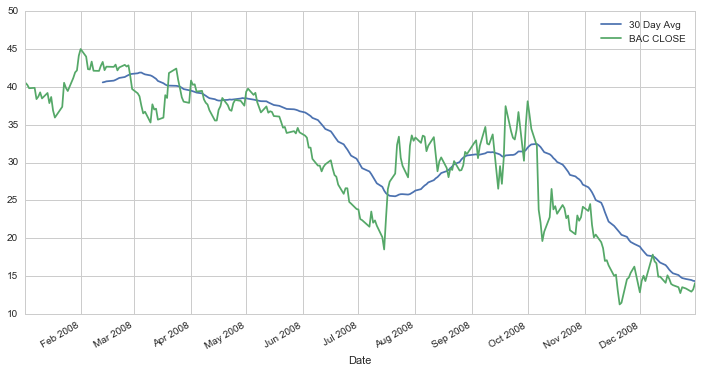

** Create a heatmap of the correlation between the stocks Close Price.**

<Axes: xlabel='Date'>

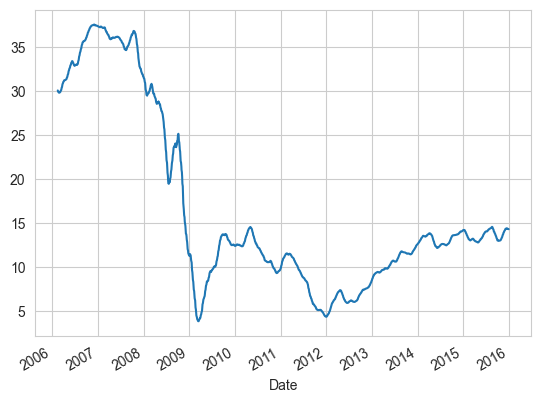

In [171]:
min_close["Rolling_Avg"].plot()

<Axes: xlabel='Bank Ticker', ylabel='Bank Ticker'>

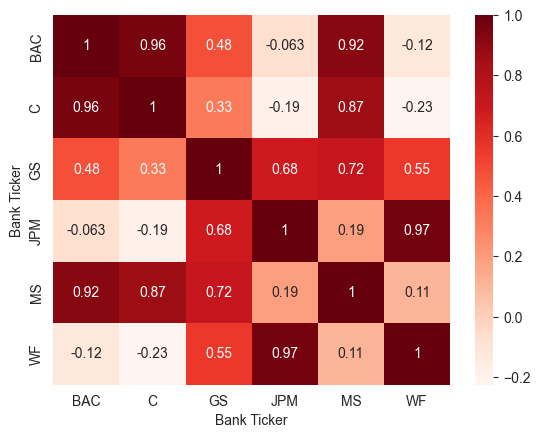

In [175]:
sns.heatmap(min_close[tickers].corr(), cmap="Reds", annot=True)

# BAC-C and JPM-WF and MS-BAC and C-MS correlation

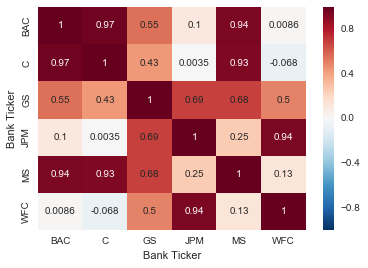

** Optional: Use seaborn's clustermap to cluster the correlations together:**

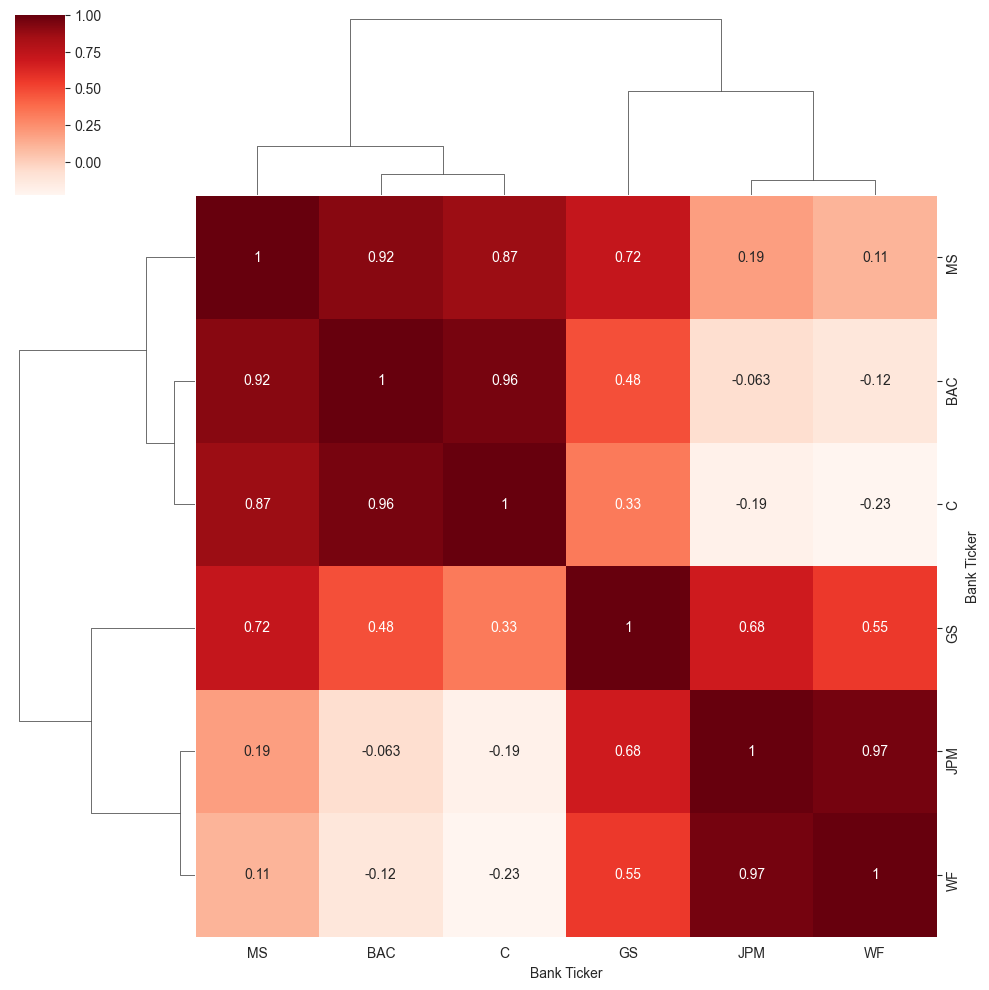

In [176]:
sns.clustermap(min_close[tickers].corr(), cmap="Reds", annot=True)

# Part 2 (Optional)

In this second part of the project we will rely on the cufflinks library to create some Technical Analysis plots. This part of the project is experimental due to its heavy reliance on the cuffinks project, so feel free to skip it if any functionality is broken in the future.

** Use .iplot(kind='candle) to create a candle plot of Bank of America's stock from Jan 1st 2015 to Jan 1st 2016.**

** Use .ta_plot(study='sma') to create a Simple Moving Averages plot of Morgan Stanley for the year 2015.**

**Use .ta_plot(study='boll') to create a Bollinger Band Plot for Bank of America for the year 2015.**

# Great Job!

Definitely a lot of more specific finance topics here, so don't worry if you didn't understand them all! The only thing you should be concerned with understanding are the basic pandas and visualization oeprations.